# Graph Visualization

---
## Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---
## Basic Attributes

alpha : 투명도   
kind : 그래프 종류 'line', 'bar', 'barh', 'kde'  
logy : Y축에 대해 Log scaling  
use_index : 객체의 색인을 눈금 이름으로 사용할지 여부  
rot : 눈금 이름 돌리기 (rotating) 0 ~ 360  
xticks, yticks : x, y축으로 사용할 값  
xlim, ylim : X, Y축의 한계  
grid : 축의 그리드를 표현할지 여부

subplots : 각 column에 독립된 subplot 그리기  
sharex, sharey : subplots=True 이면 같은 X,Y축을 공유하고 눈금과 한계를 연결  
figsize : 생성될 그래프의 크기를 tuple로 지정  
title : 그래프의 제목 지정  
legend : subplot의 범례 지정  
sort_columns : column을 알파벳 순서로 그린다.  

---
# Matplotlib 사용하기

## 여러 그래프 그릴 준비 하기

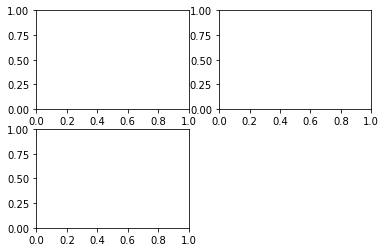

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

--- 
## 점선 그래프 그리기

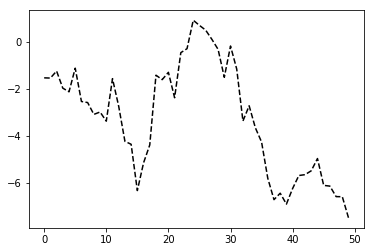

In [3]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

plt.show()

---

# Multi Graph 그리기

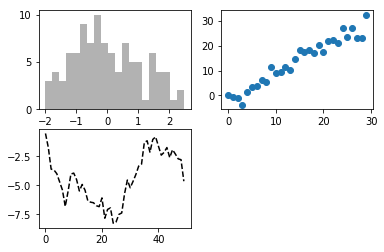

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')

_ = ax1.hist(np.random.randn(100), 
             bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), 
            np.arange(30) + 3 * np.random.randn(30))

plt.show()

--- 
## 색 정해주기

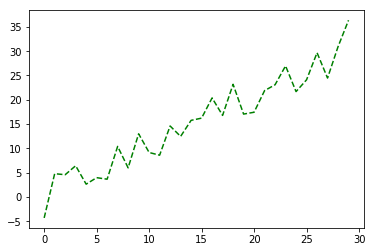

In [5]:
x = np.arange(30)
y = np.arange(30) + 3 * np.random.randn(30)
plt.plot(x, y, 'g--')
plt.show()

--- 
## 그래프 겹치기 + legend 달기

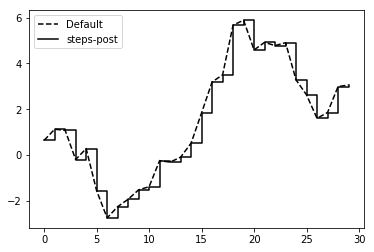

In [6]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', 
         label='steps-post')
plt.legend(loc='best')
plt.show()

--- 
## 이름 달기

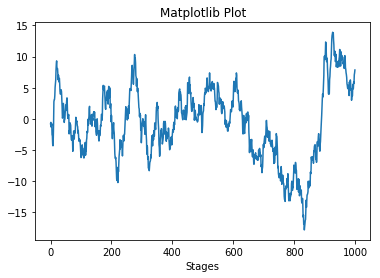

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title("Matplotlib Plot")
ax.set_xlabel("Stages")
plt.show()

---
## 종합

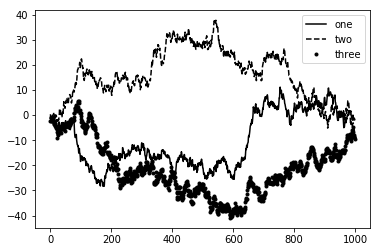

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 
        'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 
        'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 
        'k.', label='three')

ax.legend(loc='best')
plt.show()

---
## 그래프 저장하기

In [9]:
plt.savefig("fig_saved.svg")

<Figure size 432x288 with 0 Axes>

---
# Pandas에서 그리기 


--- 
## 데이터 준비하기

In [10]:
import pandas as pd
from sklearn.datasets import load_iris

---

In [11]:
iris = load_iris()

df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']], 
    columns=iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


---
## Line Graph

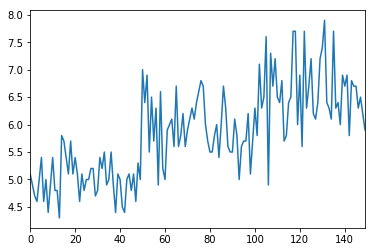

In [12]:
df['sepal length (cm)'].plot()
plt.show()

---
## Multi Graph 그리기

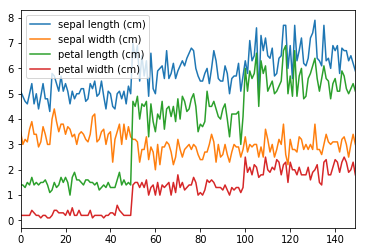

In [13]:
df[['sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']].plot()

plt.show()

---
## 옵션 주기

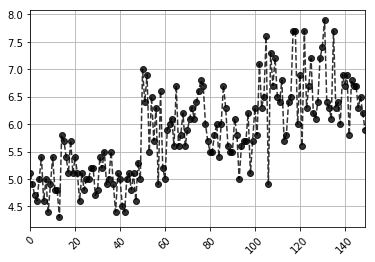

In [14]:
df['sepal length (cm)'].plot(
    style='ko--', alpha=0.8, 
    use_index=True, rot=45, grid=True)

plt.show()

---
## 막대 그래프

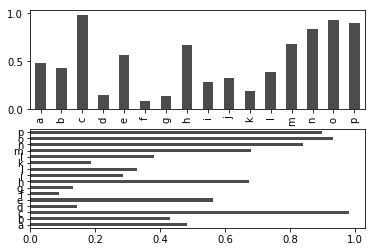

In [15]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(
    np.random.rand(16), 
    index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], 
          color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], 
          color='k', alpha=0.7)

plt.show()

---

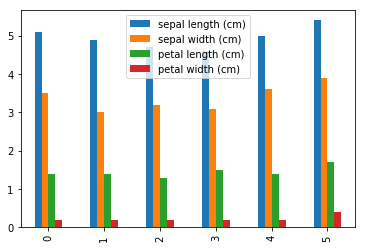

In [16]:
df.loc[0:5, df.columns[:-1]].plot(kind='bar')

plt.show()

---

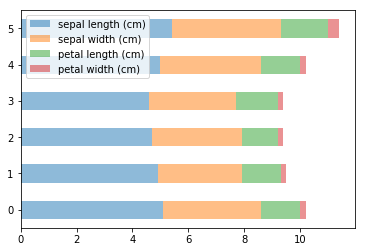

In [17]:
df.loc[0:5, df.columns[:-1]].plot(
    kind='barh', stacked=True, alpha=0.5)

plt.show()

---

bin은 굵기를 말한다

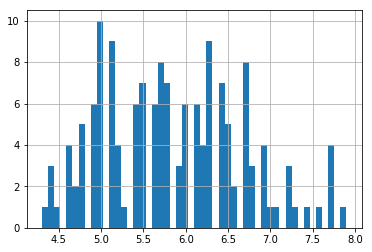

In [18]:
df['sepal length (cm)'].hist(bins=50)   

plt.show()

---


Kernel Density Estimate. 가우시안 분포를 그리는지 확인

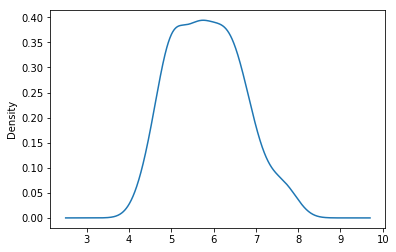

In [19]:
df['sepal length (cm)'].plot(kind='kde')

plt.show()

---


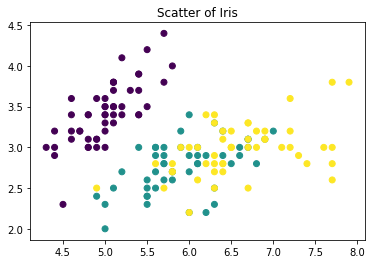

In [20]:
plt.scatter(df['sepal length (cm)'], 
            df['sepal width (cm)'], c=df.target)
plt.title("Scatter of Iris")

plt.show()